In [234]:
import pandas as pd
import numpy as np
import string
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

In [235]:
def toWordList(text):
    text_array = []
    word_list= []
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(text)):
        text_array.append(np.array(tokenizer.tokenize(text[idx].lower())))
    for words in text_array:
        for word in words:
            word_list.append(word)
    return np.array(word_list)

In [236]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in vectorizer.get_stop_words()]

In [249]:
def get_recommended_wines(search_term, model, vectorizer):
    distances, indices = nbrs.kneighbors(vectorizer.transform([search_term]), 10)
    distances = distances.flatten()
    indices = indices.flatten()
    descriptions = reviewsDf.iloc[indices]['description']
    titles = reviewsDf.iloc[indices]['title']
    return distances, np.array(descriptions), np.array(titles)

# Data Prep

In [238]:
reviewsDf = pd.read_csv('./data/winemag-data-130k-v2.csv') 

In [239]:
reviewsDf = reviewsDf[['description','title']]

In [240]:
descriptions = reviewsDf.description.tolist()

In [241]:
all_words = toWordList(descriptions)

# Word Frequency

In [242]:
wordFreq = FreqDist(all_words)

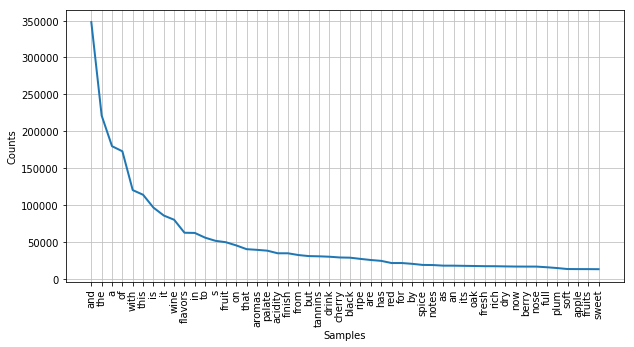

In [243]:
plt.figure(figsize=(10, 5))
wordFreq.plot(50,cumulative=False) # Top 50 used words
plt.show()

In [244]:
stop_words = [word[0] for word in wordFreq.most_common(20)]

# Create NB Model

In [245]:
vectorizer = CountVectorizer(stop_words = stop_words, analyzer=text_process)
tfidf_matrix = vectorizer.fit_transform(descriptions)

In [246]:
nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(tfidf_matrix)

In [252]:
closest = get_recommended_wines('white and sweet wine', nbrs, vectorizer)

In [253]:
for i in range(len(closest[0])):
    print(f'Score: {closest[0][i]}')
    print(f'Title: {closest[2][i]}')
    print(f'Description: {closest[1][i]}')
    print('\n')

Score: 0.42264973081037416
Title: Naches Heights 2006 Pinot Gris (Columbia Valley (WA))
Description: A flat tasting, slightly sweet, generic white wine.


Score: 0.4478423696257673
Title: Signano 2015  Vernaccia di San Gimignano
Description: This simple white has subdued aromas of white spring flower and white stone fruit. The no-fuss, rather diluted palate offers hints of white peach, green apple and a whisper of white almond.


Score: 0.4478423696257673
Title: Signano 2015  Vernaccia di San Gimignano
Description: This simple white has subdued aromas of white spring flower and white stone fruit. The no-fuss, rather diluted palate offers hints of white peach, green apple and a whisper of white almond.


Score: 0.5
Title: Lander-Jenkins 2010 Spirit Hawk Chardonnay (California)
Description: Very sweet in white sugared orange and vanilla flavors, like a honey-nut candy bar. Will satisfy Chard lovers with a sweet tooth


Score: 0.5000000000000001
Title: Michael Pozzan 2012 Dante Reserve Pi